#### Recursion 递归

递归需要满足的三个条件：
* 一个问题的解可以分成为几个子问题的解
* 这个问题与分解的子问题，除了数据规模不同，求解思路完全一样
* 存在递归终止条件
  

##### 堆栈溢出

* 函数调用使用栈来保存临时变量
* 每调用一个函数，都会将临时变量封装为栈帧压入内存栈，等函数执行完成返回时，才出栈
* 系统栈或者虚拟机栈空间一般都不大，如果递归求解的数据规模很大，调用层次很深，一直压入栈，就会有堆栈溢出的风险
* Exception in thread "main" java.lang.StackOverflowError


##### 重复计算

* 可以通过一个数据结构（比如散列表）来保存已经求解过的 f(k)

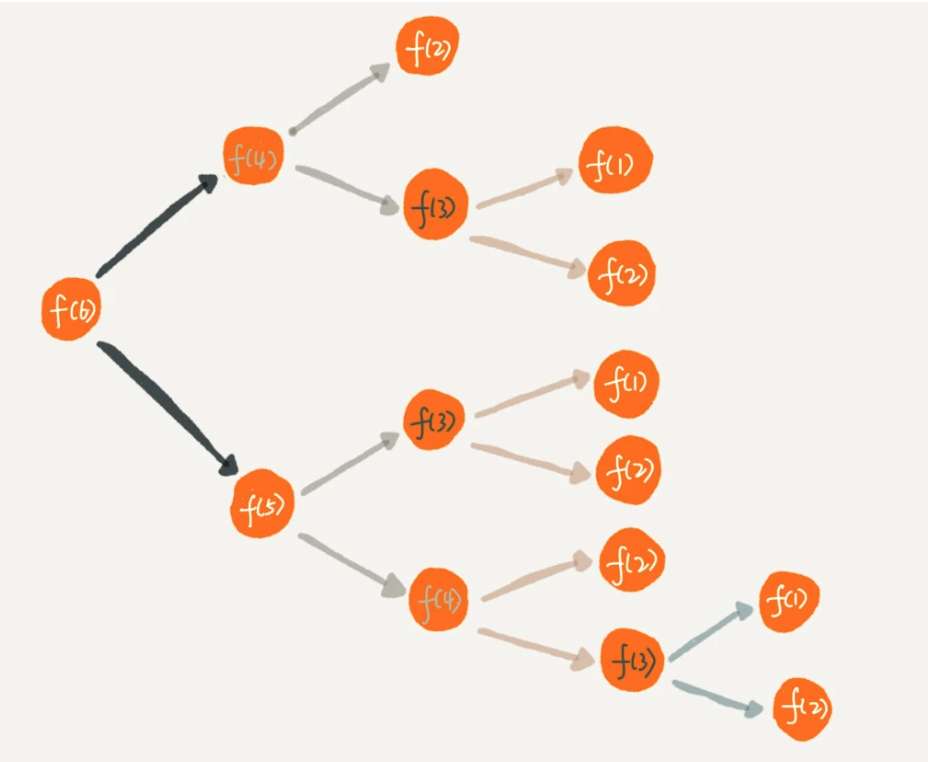

~~~
public int f(int n) {
  if (n == 1) return 1;
  if (n == 2) return 2;
  
  // hasSolvedList可以理解成一个Map，key是n，value是f(n)
  if (hasSolvedList.containsKey(n)) {
    return hasSolvedList.get(n);
  }
  
  int ret = f(n-1) + f(n-2);
  hasSolvedList.put(n, ret);
  return ret;
}
~~~

##### 空间/时间复杂度

* 当这些函数调用的数量较大时，就会积聚成一个可观的时间成本。
* 在空间复杂度上，因为递归调用一次就会在内存栈中保存一次现场数据，所以在分析递归代码空间复杂度时，需要额外考虑这部分的开销
  * 比如f(n) = f(n-1)+f(n-2)，空间复杂度并不是 O(1)，而是 O(n)。



In [ ]:
'''
leetcode Easy

70. Climbing Stairs

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?
'''

class Solution:

    def __init__(self):
        self.cacheMap = {0:1,1:1}

    def climbStairs(self, n: int) -> int:
        if n in self.cacheMap:
            return self.cacheMap[n]
        
        self.cacheMap[n] = self.climbStairs(n-1) + self.climbStairs(n-2)
        return self.cacheMap[n]
        

In [ ]:
'''
50. Pow(x, n) Medium

Implement pow(x, n), which calculates x raised to the power n (i.e., xn).

Example 1:

Input: x = 2.00000, n = 10
Output: 1024.00000
Example 2:

Input: x = 2.10000, n = 3
Output: 9.26100
Example 3:

Input: x = 2.00000, n = -2
Output: 0.25000
Explanation: 2-2 = 1/22 = 1/4 = 0.25

'''

class Solution:
    def myPow(self, x: float, n: int) -> float:
        if n == 0:
            return 1
        
        if n < 0:
            return 1/self.myPow(x, -n)
        if n%2:
            return x * self.myPow(x, n-1)

        return self.myPow(x*x, n/2)

In [ ]:
'''
leetcode Hard
239. Sliding Window Maximum

You are given an array of integers nums, there is a sliding window of size k which is moving from the very left of the array to the very right. You can only see the k numbers in the window. Each time the sliding window moves right by one position.

Return the max sliding window.

 

Example 1:

Input: nums = [1,3,-1,-3,5,3,6,7], k = 3
Output: [3,3,5,5,6,7]
Explanation: 
Window position                Max
---------------               -----
[1  3  -1] -3  5  3  6  7       3
 1 [3  -1  -3] 5  3  6  7       3
 1  3 [-1  -3  5] 3  6  7       5
 1  3  -1 [-3  5  3] 6  7       5
 1  3  -1  -3 [5  3  6] 7       6
 1  3  -1  -3  5 [3  6  7]      7
Example 2:

Input: nums = [1], k = 1
Output: [1]
 

Constraints:

1 <= nums.length <= 105
-104 <= nums[i] <= 104
1 <= k <= nums.length
'''